In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 

In [2]:
Path_Energy = 'data\my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data_day = data.resample('D').mean()
data_day.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000
mean,32079.870543,2009.801948,6.436046,15.720416,2.481268,180.459482,26.218518,2.999670,11.499396,0.027232,0.027067,0.027232
std,4686.674346,4.792876,3.439041,8.802821,1.114494,105.140323,15.020162,1.999752,0.151316,0.162773,0.162293,0.162773
min,19769.041667,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28627.854167,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,11.500000,0.000000,0.000000,0.000000
50%,31359.708333,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,11.500000,0.000000,0.000000,0.000000
75%,34972.520833,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,11.500000,0.000000,0.000000,0.000000
max,52229.833333,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,12.000000,1.000000,1.000000,1.000000


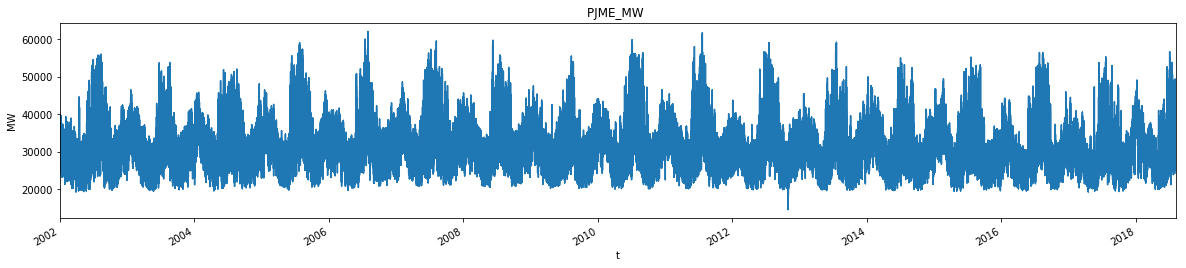

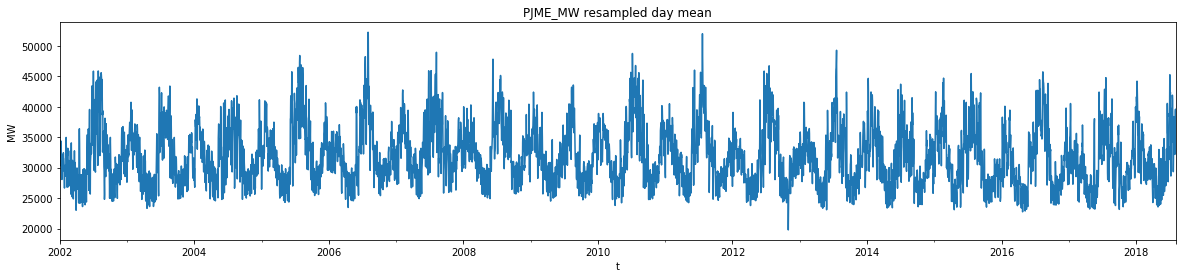

In [4]:
_ = data['PJME_MW'].plot( style='-', figsize=( 20, 4 ), title='PJME_MW ')
plt.ylabel('MW')
plt.xlabel('t')
plt.show()

_ = data_day['PJME_MW'].plot( style='-', figsize=( 20, 4 ), title='PJME_MW resampled day mean')
plt.ylabel('MW')
plt.xlabel('t')
plt.show()

In [5]:
def exponential_smoothing(series, alpha):
    
    result = [series[0]]
    
    for i in range(1, len(series)):
        result.append(alpha * series[i] + (1 - alpha) * result[i-1])
    
    return result

In [6]:
data_exp_01 = exponential_smoothing(data_day['PJME_MW'], 0.01)
data_exp_05 = exponential_smoothing(data_day['PJME_MW'], 0.05)
data_exp_10 = exponential_smoothing(data_day['PJME_MW'], 0.1)

Text(0.5, 1.0, 'PJME_MW')

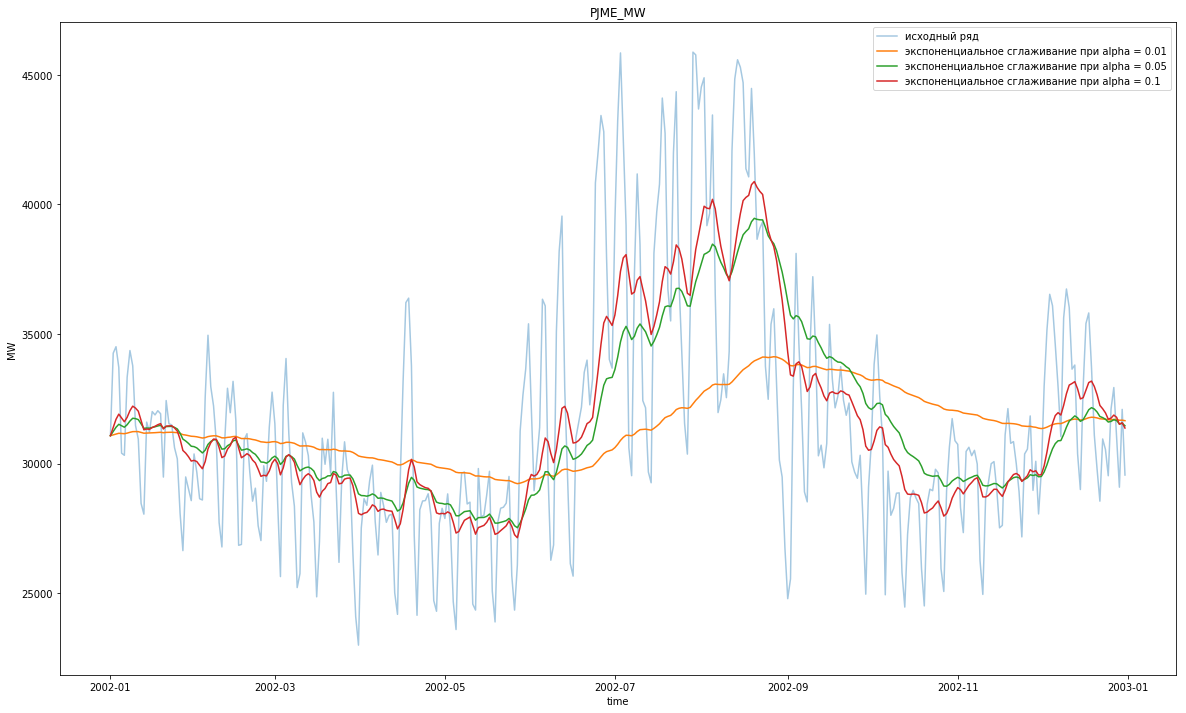

In [7]:
plt.figure(figsize=(20, 12))
plt.plot(data_day.index[:365], data_day['PJME_MW'][:365], label='исходный ряд', alpha=0.4)

plt.plot(data_day.index[:365], data_exp_01[:365], label='экспоненциальное сглаживание при alpha = 0.01');
plt.plot(data_day.index[:365], data_exp_05[:365], label='экспоненциальное сглаживание при alpha = 0.05');
plt.plot(data_day.index[:365], data_exp_10[:365], label='экспоненциальное сглаживание при alpha = 0.1');

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

In [8]:
import statsmodels.api as sm

In [9]:
DF_data = sm.tsa.stattools.adfuller(data_exp_10, regression='ctt')
DF_data

(-12.7174496465567,
 8.844119887743192e-21,
 34,
 6024,
 {'1%': -4.373054660566805,
  '5%': -3.833370706612336,
  '10%': -3.55386764946938},
 79769.65029739408)

In [10]:
temp_df = pd.DataFrame(data=data_exp_10, index = data_day.index)

lags = 3

for lag in range(1, lags + 1):
    temp_df[f'lag_{lag}'] = 0
    temp_df.iloc[lag:, lag] = temp_df.iloc[:-lag, 0].values
    
temp_df.fillna(0)

temp_df.tail()

,0,lag_1,lag_2,lag_3
Date,,,,
2018-07-30,35528.628504,35814.318708,36220.030046,36411.616718
2018-07-31,35429.673987,35528.628504,35814.318708,36220.030046
2018-08-01,35809.785755,35429.673987,35528.628504,35814.318708
2018-08-02,36188.111346,35809.785755,35429.673987,35528.628504
2018-08-03,36117.900211,36188.111346,35809.785755,35429.673987


In [11]:
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
def split_data_b(data, split_date):
    
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

def mean_absolute_percentage_error(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [13]:
def make_train_test(train, test, h):
    
    X_train = train.iloc[:-h,:]
    y_train = train[0].values[h:]
    X_test = test.iloc[:-h,:]
    y_test = test[0].values[h:]
    
    return X_train, X_test, y_train, y_test

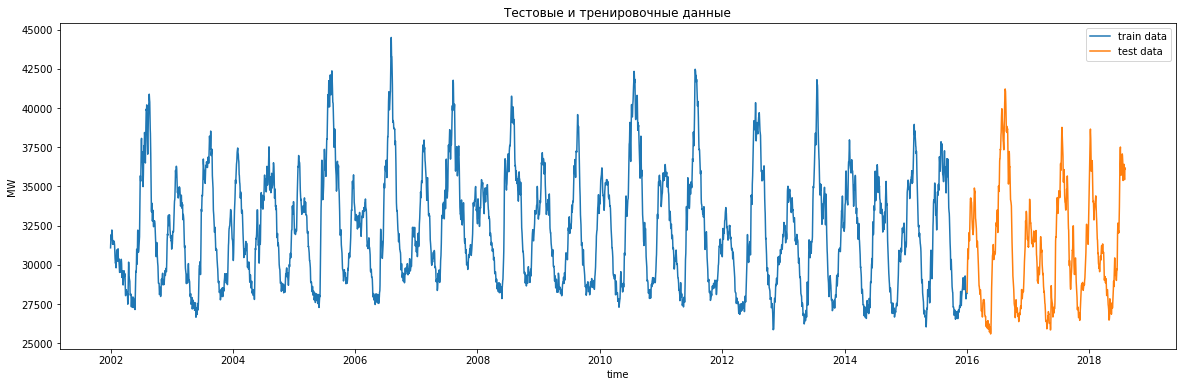

In [14]:
train_b, test_b = split_data_b(temp_df, '1-1-2016')

X_train_b, X_test_b, y_train_b, y_test_b = make_train_test(train_b, test_b, 1)

plt.figure( figsize=( 20, 6 ))
plt.xlabel('time')
plt.ylabel('MW')
plt.plot(train_b.index, train_b[0], label='train data' )
plt.plot(test_b.index, test_b[0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

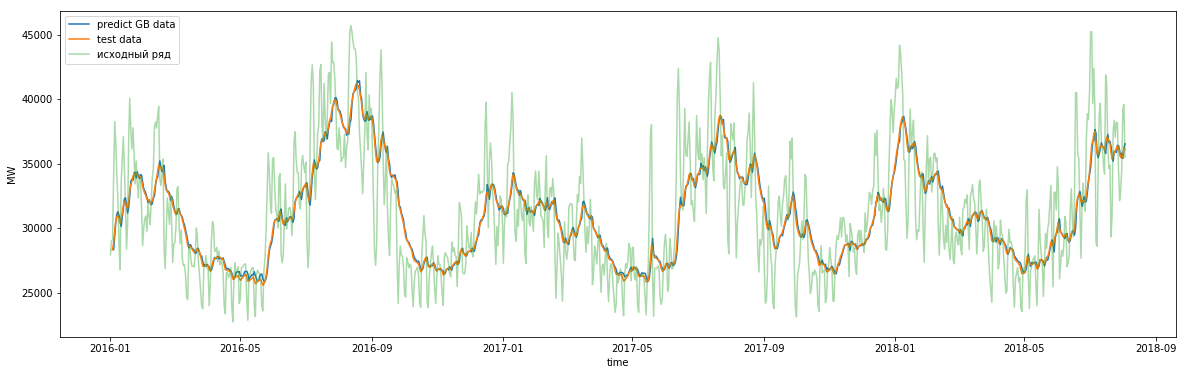

ошибка градиентного бустинга :   0.6628645450251733 %


In [16]:
h = 1

model_gb = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, random_state=0, n_estimators=500)
model_gb.fit(X_train_b, y_train_b) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure(figsize=(20, 6))

plt.xlabel('time')
plt.ylabel('MW')
plt.plot(test_b.index[h:], X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:], y_test_b, label='test data')
plt.plot(data_day.loc['1-1-2016':].index, data_day.loc['1-1-2016':]['PJME_MW'], label='исходный ряд', alpha=0.4)

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

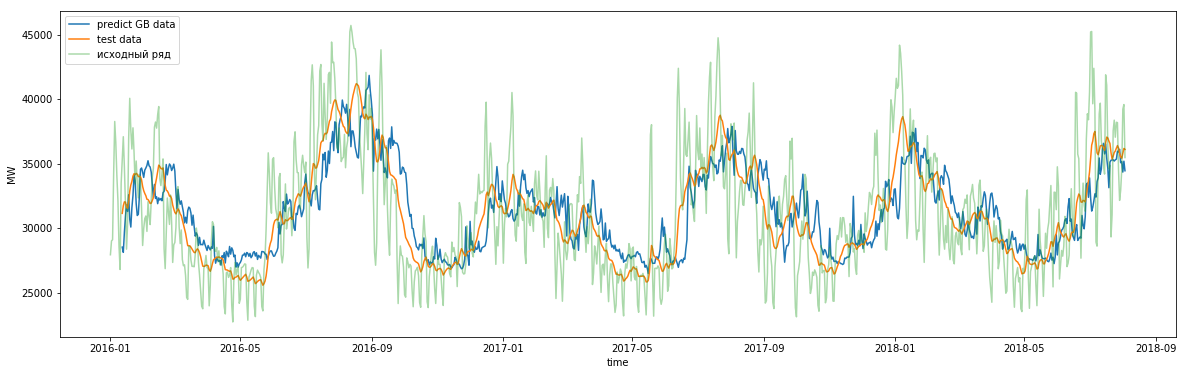

ошибка градиентного бустинга :   4.875761008049893 %


In [17]:
h = 10

X_train_b, X_test_b, y_train_b, y_test_b = make_train_test(train_b, test_b, h)

model_gb = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, random_state=0, n_estimators=500)
model_gb.fit(X_train_b, y_train_b) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure(figsize=(20, 6))

plt.xlabel('time')
plt.ylabel('MW')
plt.plot(test_b.index[h:], X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:], y_test_b, label='test data')
plt.plot(data_day.loc['1-1-2016':].index, data_day.loc['1-1-2016':]['PJME_MW'], label='исходный ряд', alpha=0.4)

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

In [18]:
horizonts = list(range(1, 11))
errors = []

for h in horizonts:
    X_train_b, X_test_b, y_train_b, y_test_b = make_train_test(train_b, test_b, h)
    
    model_gb = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, random_state=0, n_estimators=500)
    model_gb.fit(X_train_b, y_train_b) 
    X_test_pred_gb = model_gb.predict(X_test_b)
    
    err = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)
    errors.append(err)
    
    print(f'для h={h} ошибка градиентного бустинга: {err}')

для h=1 ошибка градиентного бустинга: 0.6628645450251733
для h=2 ошибка градиентного бустинга: 1.422702586165037
для h=3 ошибка градиентного бустинга: 2.096060121694296
для h=4 ошибка градиентного бустинга: 2.6088224143679803
для h=5 ошибка градиентного бустинга: 2.9988588363555144
для h=6 ошибка градиентного бустинга: 3.3768896181023065
для h=7 ошибка градиентного бустинга: 3.7331974155310212
для h=8 ошибка градиентного бустинга: 4.059848715055722
для h=9 ошибка градиентного бустинга: 4.474968835017829
для h=10 ошибка градиентного бустинга: 4.875761008049893


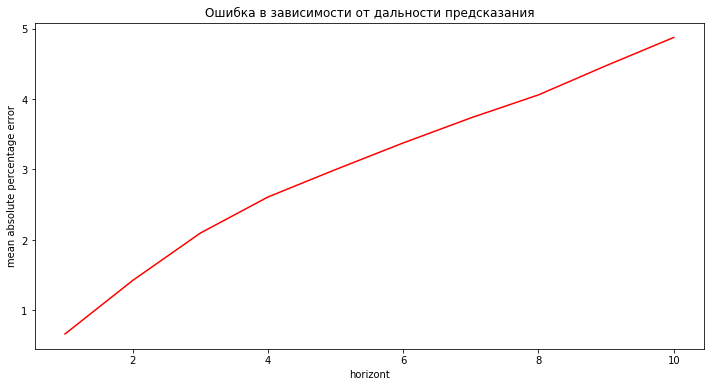

In [19]:
plt.figure(figsize=(12, 6))

plt.xlabel('horizont')
plt.ylabel('mean absolute percentage error')

plt.plot(horizonts, errors, color='red')

plt.title('Ошибка в зависимости от дальности предсказания')
plt.show()

In [20]:
temp_df = pd.DataFrame(data=data_exp_10, index = data_day.index)

lags = 30

for lag in range(1, lags + 1):
    temp_df[f'lag_{lag}'] = 0
    temp_df.iloc[lag:, lag] = temp_df.iloc[:-lag, 0].values
    
temp_df.fillna(0)

temp_df.tail()

,0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-30,35528.628504,35814.318708,36220.030046,36411.616718,36213.851909,35990.816936,35871.778077,35592.767307,35374.588675,35853.737416,...,35704.580325,35848.404064,36651.916553,37510.296170,37328.634633,36764.885704,36444.007264,35464.670108,34380.952897,33691.632849
2018-07-31,35429.673987,35528.628504,35814.318708,36220.030046,36411.616718,36213.851909,35990.816936,35871.778077,35592.767307,35374.588675,...,36020.734792,35704.580325,35848.404064,36651.916553,37510.296170,37328.634633,36764.885704,36444.007264,35464.670108,34380.952897
2018-08-01,35809.785755,35429.673987,35528.628504,35814.318708,36220.030046,36411.616718,36213.851909,35990.816936,35871.778077,35592.767307,...,36388.619646,36020.734792,35704.580325,35848.404064,36651.916553,37510.296170,37328.634633,36764.885704,36444.007264,35464.670108
2018-08-02,36188.111346,35809.785755,35429.673987,35528.628504,35814.318708,36220.030046,36411.616718,36213.851909,35990.816936,35871.778077,...,36426.803515,36388.619646,36020.734792,35704.580325,35848.404064,36651.916553,37510.296170,37328.634633,36764.885704,36444.007264
2018-08-03,36117.900211,36188.111346,35809.785755,35429.673987,35528.628504,35814.318708,36220.030046,36411.616718,36213.851909,35990.816936,...,36388.839830,36426.803515,36388.619646,36020.734792,35704.580325,35848.404064,36651.916553,37510.296170,37328.634633,36764.885704


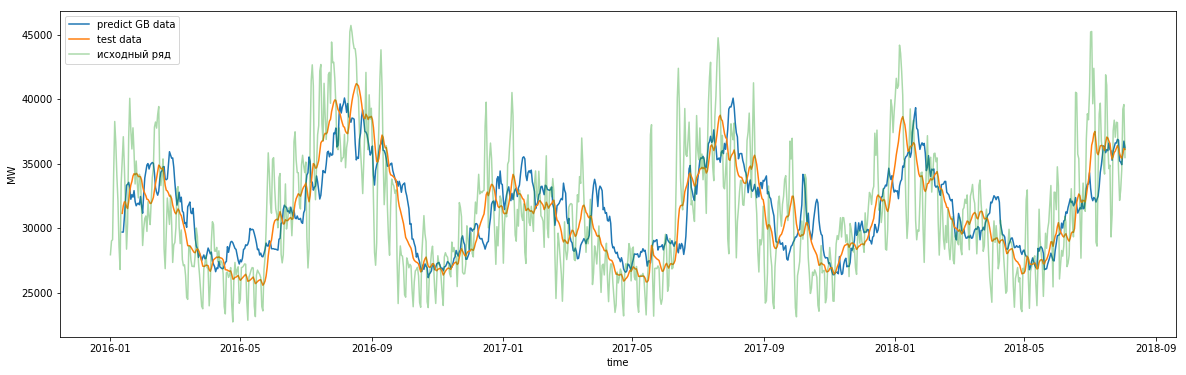

ошибка градиентного бустинга :   4.874856929191061 %


In [21]:
h = 10

train_b, test_b = split_data_b(temp_df, '1-1-2016')
X_train_b, X_test_b, y_train_b, y_test_b = make_train_test(train_b, test_b, h)

model_gb = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, random_state=0, n_estimators=500)
model_gb.fit(X_train_b, y_train_b) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure(figsize=(20, 6))

plt.xlabel('time')
plt.ylabel('MW')
plt.plot(test_b.index[h:], X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:], y_test_b, label='test data')
plt.plot(data_day.loc['1-1-2016':].index, data_day.loc['1-1-2016':]['PJME_MW'], label='исходный ряд', alpha=0.4)

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

##### Даже при увеличении лагов (с 3-х до 30-и) ошибка практически не изменилась, что говорит нам о том, что наша модель совершенно не годится для долгосрочных прогнозов. Тем более что мы пытаемся предсказать только нестационарную часть нашего ряда, отбрасывая в сторону стационарную часть.

#### Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

#### а) Изменение температуры за окном :).

##### Нестационарный с трендами (глобальное потепление и т.д.) сезонами и циклами

#### б) Количество денег, которые тратят покупатели в интернет магазине.

##### Нестационарный, с трендами сезонами и циклами

#### в) Вес растущего котенка.

##### Нестационарный с трендом (он же растет) с сезонами

#### г) Прирост объема деревьев в лесу от времени

##### Нестационарный возможно с сезонами


#### Какие из рядов на картинке стационарны на первый взгляд? (презентация, слайд номер 21)

##### Визуально ни один из рядов на слайде не похож на стационарный (отдаленно b похож, но видно как у него увеличивается дисперсия)